# Project 2 Regression Challenge - DSI 508

##### By Argishti Ovsepyan

### Imports and Read-Ins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

### Exploratory Data Analysis

In [3]:
df_train.shape

(2051, 81)

In [4]:
df_test.shape

(878, 80)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
df_train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [7]:
df_train['SalePrice'].isna().sum()

0

In [8]:
df_train.isna().sum().sort_values(ascending = False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
Sale Type            0
Full Bath            0
Half Bath            0
dtype: int64

In [9]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Data Cleaning

In [11]:
df_train.columns = df_train.columns.str.lower().str.replace(' ','_')

In [12]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [13]:
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

In [14]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


/var/folders/zr/_py5mgyx41dgfml7lmxyyff80000gn/T/ipykernel_65073/2542112580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False),


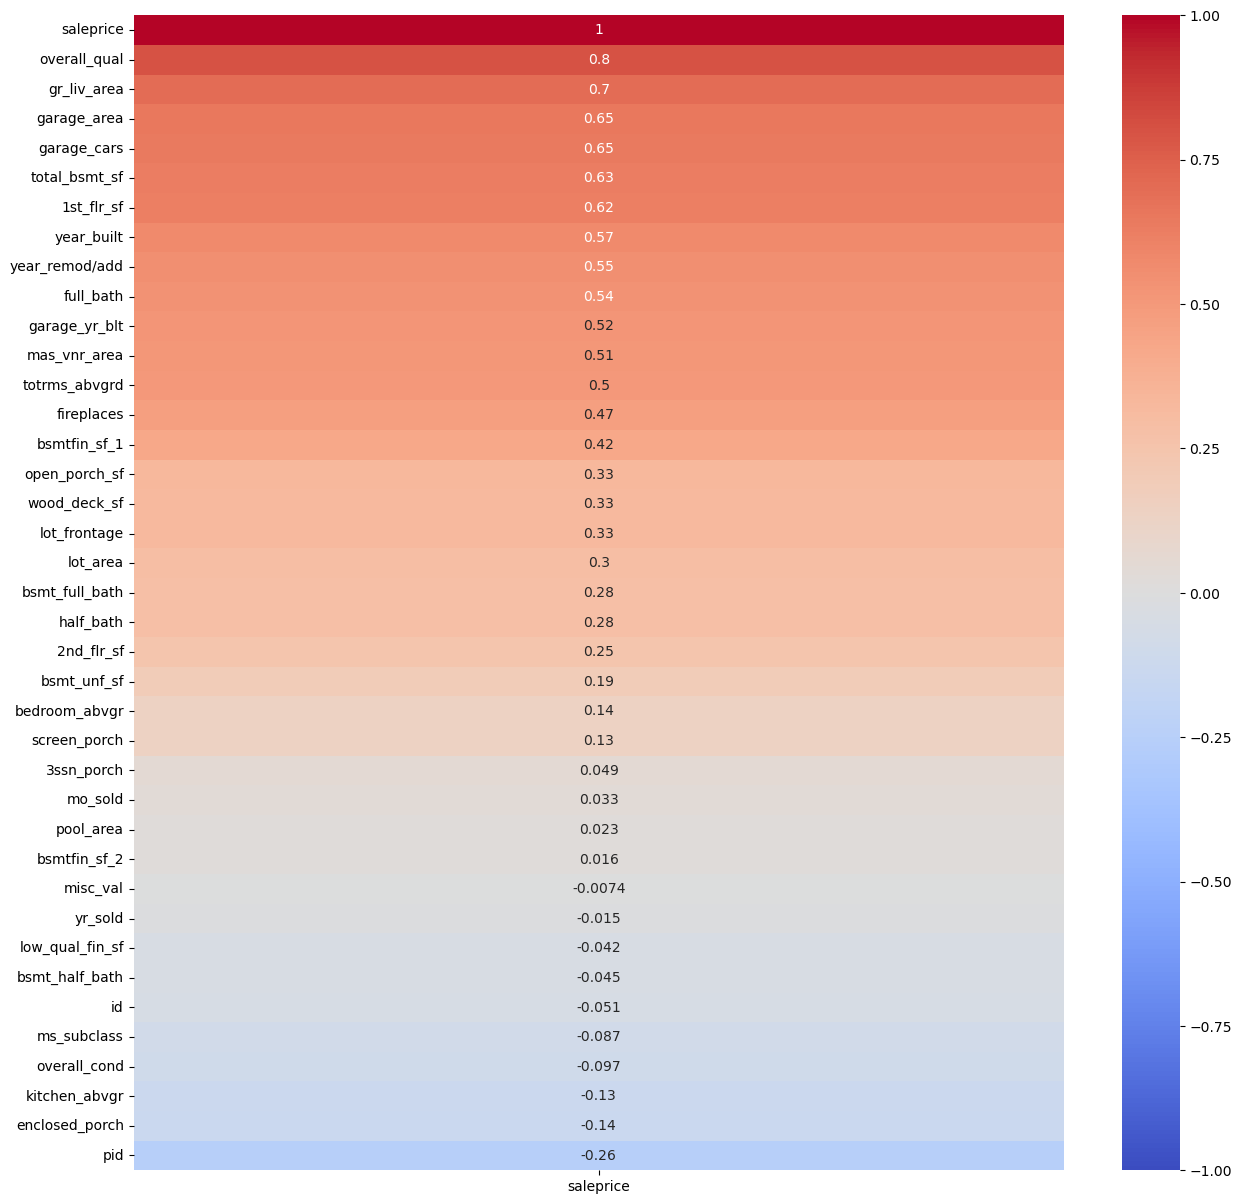

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [15]:
df_train = df_train.fillna(df_train.mean())

/var/folders/zr/_py5mgyx41dgfml7lmxyyff80000gn/T/ipykernel_65073/2439521282.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())


In [16]:
X = df_train[['overall_qual',
              'gr_liv_area', 
              'garage_area', 
              'garage_cars', 
              'total_bsmt_sf', 
              '1st_flr_sf', 
              'year_built', 
              'year_remod/add', 
              'full_bath',
              'totrms_abvgrd',
              'fireplaces',
              'bsmtfin_sf_1',
              'open_porch_sf',
              'wood_deck_sf',
              'lot_area'
             ]]
y = df_train['saleprice']

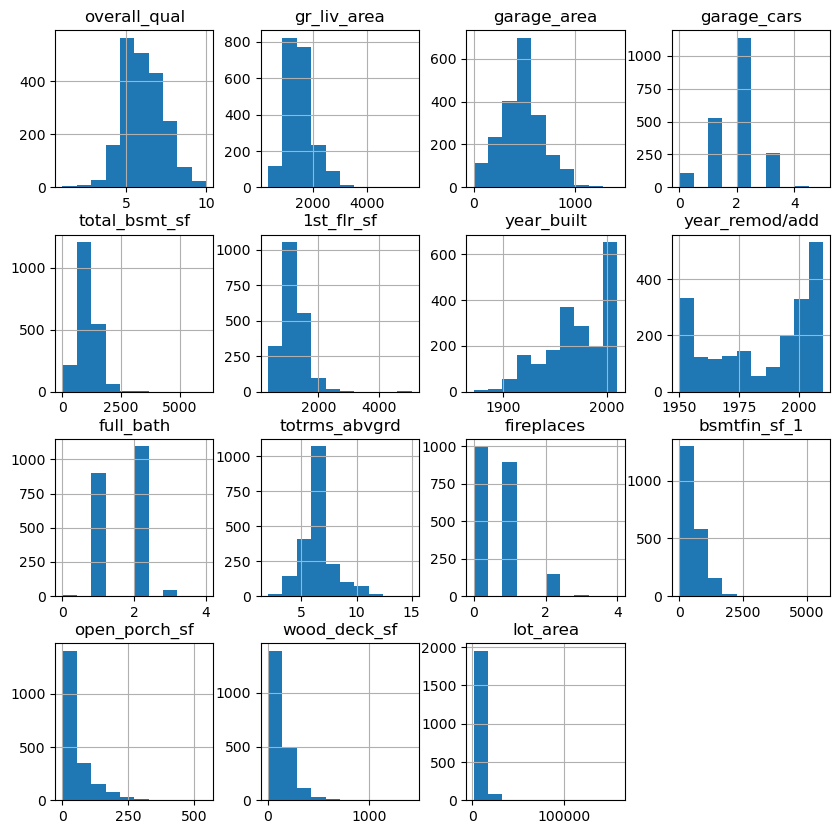

In [17]:
X.hist(figsize=(10, 10));

In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [19]:
X.isna().sum()

overall_qual      0
gr_liv_area       0
garage_area       0
garage_cars       0
total_bsmt_sf     0
1st_flr_sf        0
year_built        0
year_remod/add    0
full_bath         0
totrms_abvgrd     0
fireplaces        0
bsmtfin_sf_1      0
open_porch_sf     0
wood_deck_sf      0
lot_area          0
dtype: int64

In [20]:
X.shape

(2051, 15)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 50)

In [22]:
print(X_train.shape, y_train.shape)

(1538, 135) (1538,)


In [23]:
print(X_test.shape, y_test.shape)

(513, 135) (513,)


In [24]:
# y_train = np.array(y_train)
# y_train

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.score(X_train, y_train)

0.9215923499169552

In [28]:
lr.score(X_test, y_test)

0.8853863021584424

In [29]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)
np.mean(cross_val_score(lr, X, y, cv=kf))

0.7918248659823189

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)
np.mean(cross_val_score(lr, X_poly, y, cv=kf))

0.8382150982380343

In [31]:
y_preds = lr.predict(X_test)

In [32]:
y_preds.shape

(513,)

In [33]:
# y_preds

In [34]:
mean_squared_error(y_test, y_preds, squared = False)

27345.137778816857

In [35]:
lr.fit(X_poly, y)

LinearRegression()

In [36]:
# df_test.isna().sum().sort_values(ascending = False).head(30)

In [37]:
df_test_poly = poly.transform(df_test[[
              'overall_qual',
              'gr_liv_area', 
              'garage_area', 
              'garage_cars', 
              'total_bsmt_sf', 
              '1st_flr_sf', 
              'year_built', 
              'year_remod/add', 
              'full_bath',
              'totrms_abvgrd',
              'fireplaces',
              'bsmtfin_sf_1',
              'open_porch_sf',
              'wood_deck_sf',
              'lot_area'
]])

In [38]:
preds = lr.predict(df_test_poly)

In [39]:
df_test['saleprice'] = preds

In [40]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,144708.015620
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,157988.956224
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,205293.107143
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,114002.851110
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,184310.012986


In [41]:
preds.shape

(878,)

In [42]:
lr_submission_three = df_test[['id', 'saleprice']]

In [43]:
lr_submission_three.head()

,id,saleprice
0,2658,144708.015620
1,2718,157988.956224
2,2414,205293.107143
3,1989,114002.851110
4,625,184310.012986


In [44]:
lr_submission_three.shape

(878, 2)

In [45]:
lr_submission_three.set_index('id', inplace = True)

In [46]:
lr_submission_three.head()

,saleprice
id,
2658,144708.015620
2718,157988.956224
2414,205293.107143
1989,114002.851110
625,184310.012986


In [49]:
lr_submission_three.to_csv('submission_three_fix.csv')